In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Yolo 로드
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [70]:
# 이미지 가져오기
img = cv2.imread("sample.jpg")
# img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [71]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [72]:

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [73]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

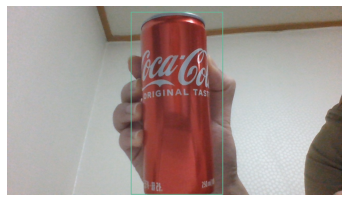

In [74]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
#         cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [75]:
# 바운딩 박스 좌표 체크
left_x = x
right_x = x+w
top_y = y
bottom_y = y+h
print(left_x, right_x, top_y, bottom_y)

474 824 23 717


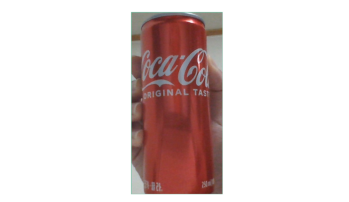

In [76]:
# 해당 영역을 제외한 값을 255로 변경
img[:top_y, :, :] = 255
img[:, :left_x, :] = 255
img[bottom_y:, :, :] = 255
img[:, right_x:, :] = 255
plt.axis('off')
plt.imshow(img)

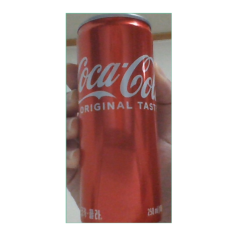

In [77]:
# 모델에는 정사각형의 이미지가 들어가므로 정사각형으로 이미지 crop
img_crop = img[:,(img.shape[1]-img.shape[0])//2:img.shape[1]-((img.shape[1]-img.shape[0])//2),:]
plt.axis('off')
plt.imshow(img_crop)